# Project: Titanic - Machince Learning from Disaster

Dự đoán tỷ lệ sống sót trên chuyến tàu titanic

1. Loading the data

In [1]:
# import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("C:/Users/trant/OneDrive/Desktop/titanic_kaggle/data/train.csv")
test_df = pd.read_csv("C:/Users/trant/OneDrive/Desktop/titanic_kaggle/data/test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Notes:
- Sibsp: # of siblings/spouses aboard the titanic
- parch: # of parents/children aboard the titanic
- Ticket: ticket number
- Cabin: Cabin number

In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nhận thấy cột passengerid không cần thiết và convert thành index

In [6]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop('PassengerId', axis = 1, inplace=True)

In [9]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
test_df = pd.read_csv("C:/Users/trant/OneDrive/Desktop/titanic_kaggle/data/test.csv", index_col="PassengerId")

In [11]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [14]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [15]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [17]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


Distribution of Numberical feature values arcoss the sample

In [19]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [20]:
train_df.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


2.	Exploratory Data Analysis (EDA)

2.1 Corelating categorical features
    - Categorical: Survived, Sex, Embarked, Pclass, SibSp, Parch

Target Variable: Survived

In [21]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [22]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Onl 38% survived the disaster. So, the traininf data suffers from data imblance but it is not severe which is why i will not consider techniques like sampling to tackle the imbalance

Sex

In [23]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

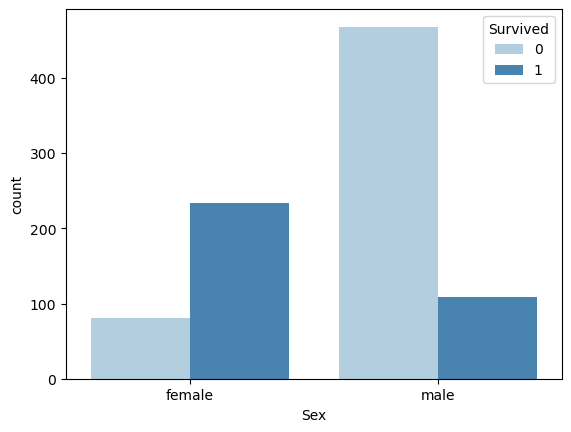

In [24]:
sns.countplot(data = train_df, x='Sex', hue="Survived", palette="Blues")

- Remaining Categorical Feature Columns

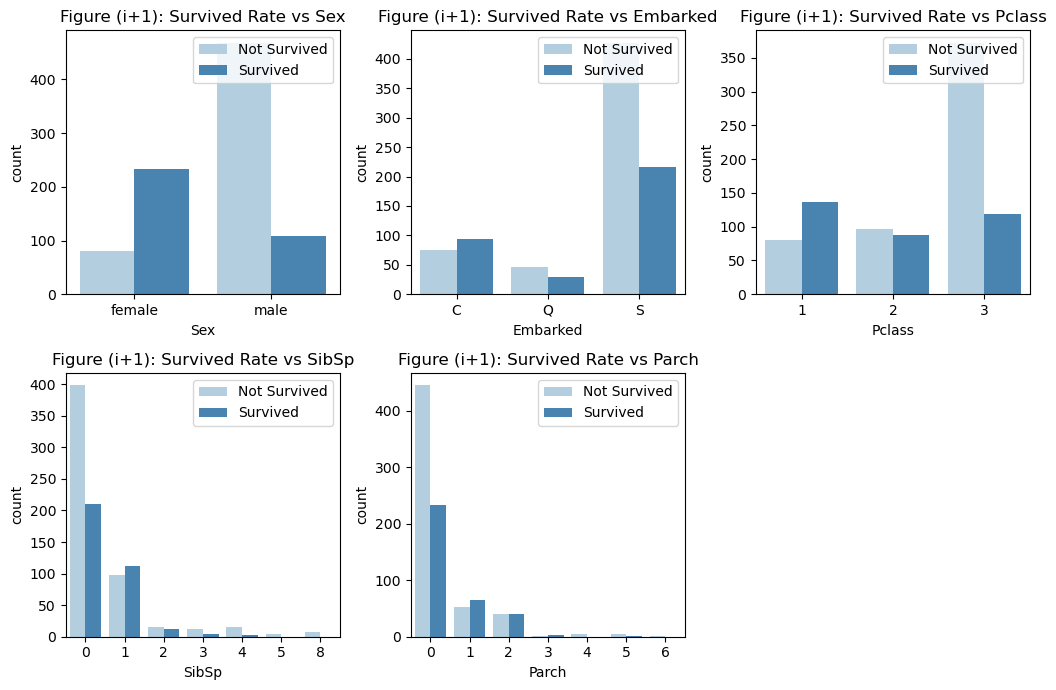

In [25]:
cols = ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list *cols*
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure (i+1): Survived Rate vs {cols[i]}")
            ax_i.legend(title="", loc="upper right", labels=['Not Survived', "Survived"])

ax.flat[-1].set_visible(False)#Remove the last subplot
plt.tight_layout()
plt.show()

 Observation Survived Rate:
- fig1: Female survived rate > male
- Fig2: Most People ebarked on Southampton, and also had the highest people not survived
- Fig3: 1st class higher survival rate
- Fig4: people going with 0 SibSp are mostly not survived. The number of passenger with 1-2 family members has a better chance of surival
- Fig 5: People going with 0 Parch are mostly not survived 

2.2. EDA for Numrical Features
- Numerical Feature:(continuous)Age, Fare.

Age

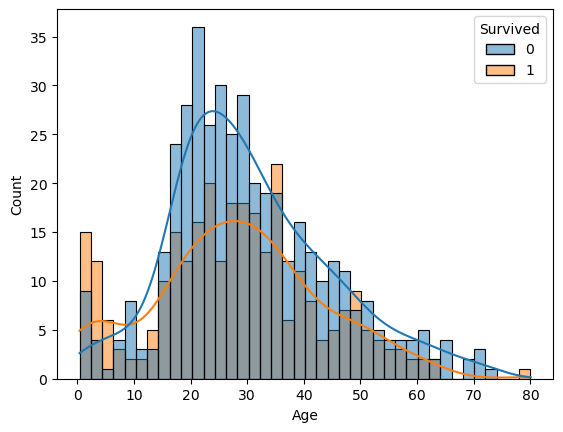

In [26]:
sns.histplot(data=train_df, x='Age', hue='Survived',bins=40, kde = True);

- Majority passengers were from 18-40 ages
- Chilren had more chance to survived than other ages

Fare

In [27]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

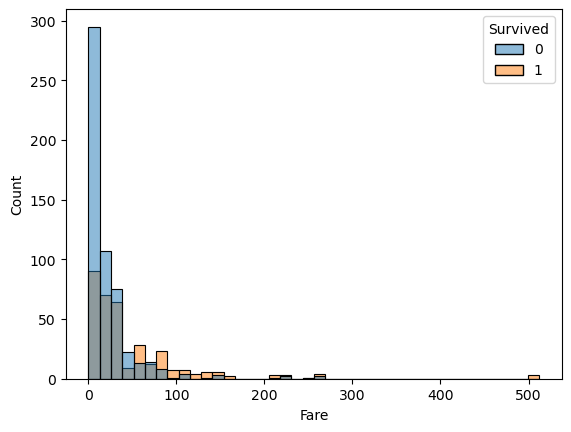

In [28]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins = 40);

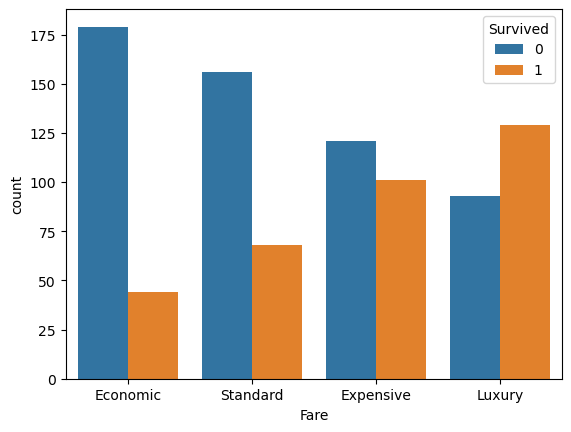

In [29]:
#To name for 0-25% quartile, 25-50, 50-70, 75-100
fare_categories=['Economic','Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'],4, labels=fare_categories)
sns.countplot(x=quartile_data, hue=train_df['Survived']);

- Distribution of Fare
    - Fare does not follow a normal distribution and has a huge spike at the price range 0-100.
    - The distribution is skewed to the left with 75% of the fare paid under 31 and a max paid fare of 512.
- Quartile plot:
    - Passenger with Luxury&Expensive Fare will have more chance to survive.

3. Feature Engineering & Data Wrangling Name

3.1. Feature engineering

- Regular Expression

In [30]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [31]:
import re #regular expression

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [32]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [33]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [34]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [35]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

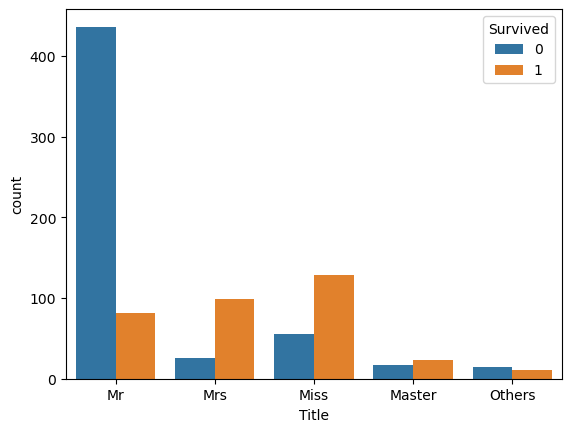

In [36]:
sns.countplot(data=train_df, x='Title', hue='Survived');

#Family
- Sinsp, Parch

In [37]:
train_df["Family_Size"] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int')+1

In [38]:
test_df["Family_Size"] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int')+1

In [39]:
train_df["Family_Cat"] = pd.cut(train_df["Family_Size"], bins=[0,1,4,6,20], labels=["Solo", 'Small', 'Medium','Large'])#(0,1] (1,4]

In [40]:
test_df["Family_Cat"] = pd.cut(test_df["Family_Size"], bins=[0,1,4,6,20], labels=["Solo", 'Small', 'Medium','Large'])#(0,1] (1,4]

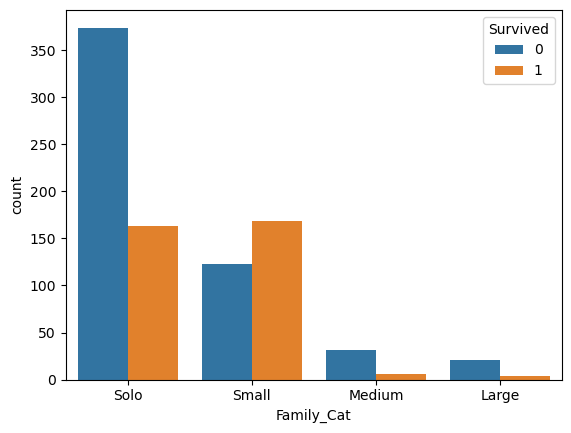

In [41]:
sns.countplot(data=train_df, x ="Family_Cat", hue = "Survived");

3.2. Data Wrangling

In [42]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [43]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count >0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


### Filling missing values

#### Age
- Filling missing values with 'median' of whole dataset

In [44]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].median()


In [45]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [46]:
#Filling the missing values in Age with the median of Sex and Pclass groups
train_df['Age']=train_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform(lambda x: x.fillna(x.median()))

In [47]:
test_df['Age']=test_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform(lambda x: x.fillna(x.median()))

In [48]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Embarked has 0.22% missing values.
Fare has 0.24% missing values.


In [49]:
X = train_df[feature_cols]
y = train_df['Survived']

In [50]:
X_test = test_df[feature_cols]

In [51]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [52]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [53]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [54]:
X = preprocessor.transform(X) # X-> x_train, x_validate

In [55]:
X_test = preprocessor.transform(X_test)

### 4. Model training

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [58]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [59]:
X_test.shape

(418, 19)

In [60]:
#binary classification
from sklearn.preprocessing import PolynomialFeatures
#sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [61]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [62]:
log_reg.score(X_val, y_val)

0.8435754189944135

In [63]:
y_pred = log_reg.predict(X_val)

In [64]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8688524590163934, 0.726027397260274)

In [65]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       106
           1       0.87      0.73      0.79        73

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179



- nâng bậc đồ thị lê có thể dùng polynomial features
- y = a*x1 + b*x2 +bias -> y = a*x1^2 + b*x2^2 + c x1*x2 _bias

In [66]:
poly = PolynomialFeatures(degree=5)#nang len bac 2
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [67]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [68]:
poly_log_reg.score(poly_features_X_val, y_val) 

0.8491620111731844

In [69]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=8, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [70]:
decision_tree.score(X_val, y_val)

0.7988826815642458

### 4.1. Cross-validation

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth=8, random_state=2023)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)#tự động chia ra làm 5 fold
lr_scores.mean(), lr_scores.std()

(np.float64(0.826031008725127), np.float64(0.020466357172416235))

In [73]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)

In [74]:
dt_scores.mean(), dt_scores.std()

(np.float64(0.8058690603226415), np.float64(0.01719257924007743))

### 4.2. Baseline Model Comparison

In [75]:
!pip install xgboost


Access is denied.


In [76]:

from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier#!pip insttall xgboost
seed=2023
models = {
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state = seed),
    KNeighborsClassifier(metric = 'minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    #(use_label_encoder=False, eval_metric='logloss', random_state=seed)
}

In [77]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    #define k-fold:
    kfold= StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries=[]
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
        
    #Summary result 
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    #sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)

    return baseline_results
    #return cv_df

generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.824907,0.036325
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.805819,0.013806
DecisionTreeClassifier,0.794608,0.016252


## 5) Hyperparameter tuning (GridSearchCV) for chosen model
Ở bước baseline bạn hãy chọn mô hình có accuracy cao nhất làm mục tiêu tuning. Ở đây mình ví dụ dùng RandomForest; nếu bạn muốn tuning model khác hãy chỉnh `estimator`.


In [85]:
# Setup GridSearchCV for RandomForest (adjust param_grid if desired)
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Ensure `preprocessor`, `X`, `y`, `num_features`, `cat_features` are defined in your notebook above.
try:
    _ = preprocessor
    _ = X
    _ = y
    _ = num_features
    _ = cat_features
except NameError as e:
    print('One or more required variables (preprocessor, X, y, num_features, cat_features) are not defined.')
    raise

# ⚠️ Không dùng X[num_features+cat_features] vì X đã bị transform thành NumPy array
# Sử dụng DataFrame gốc train_df[feature_cols] thay thế
X_original = train_df[num_features + cat_features]

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(rf_pipe, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit trên DataFrame gốc để preprocessor xử lý
grid.fit(X_original, y)

print('Best params:', grid.best_params_)
print('Best CV score:', grid.best_score_)

# Lưu lại mô hình tốt nhất
best_grid = grid


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best CV score: 0.8338899001945892


## 6) Evaluate tuned model on held-out validation set
Nếu trước đó bạn đã chia data bằng `train_test_split` thành X_train/X_val, ta sẽ dùng X_val để đánh giá. Nếu không, bạn có thể tạo một hold-out split hoặc sử dụng cross-validation.

Created hold-out split: Xtr (712, 7) Xv (179, 7)
Validation accuracy (tuned): 0.8268156424581006

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



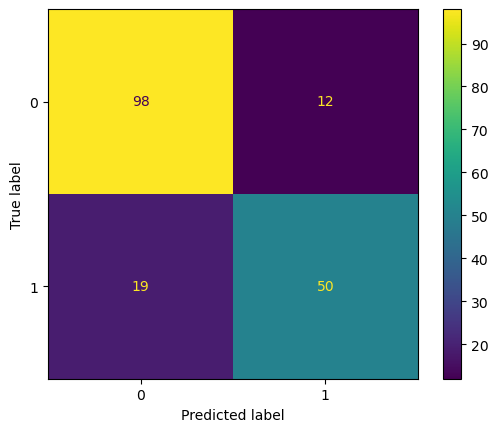

In [97]:
# RESET & Evaluate tuned RandomForest model (chạy an toàn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

# 1) Đảm bảo dùng DataFrame gốc với feature_cols
X_df = train_df[num_features + cat_features].copy()   # DataFrame gốc
y_ser = train_df['Survived'].copy()                   # Series gốc

# 2) Tạo lại hold-out split từ X_df (không dùng X đã transform)
#    Luôn chia từ X_df để giữ index và tên cột đúng
Xtr, Xv, ytr, yv = train_test_split(X_df, y_ser, test_size=0.2, stratify=y_ser, random_state=42)
print('Created hold-out split: Xtr', Xtr.shape, 'Xv', Xv.shape)

# 3) Lấy mô hình tốt nhất từ GridSearch (đảm bảo best_grid đã tồn tại)
if 'best_grid' not in globals():
    raise RuntimeError("best_grid not found. Hãy chạy cell GridSearchCV trước (grid.fit(...)).")
best_model = best_grid.best_estimator_

# 4) Fit & evaluate (pipeline chứa preprocessor sẽ xử lý DataFrame tự động)
best_model.fit(Xtr, ytr)
preds = best_model.predict(Xv)

print('Validation accuracy (tuned):', accuracy_score(yv, preds))
print('\nClassification report:\n', classification_report(yv, preds))

# 5) Confusion matrix hiển thị
ConfusionMatrixDisplay.from_predictions(yv, preds)


## 7) Ensemble: Voting Classifier (soft voting)
Kết hợp nhiều mô hình (ví dụ LogisticRegression, RandomForest, DecisionTree) để tạo một mô hình ensemble.

In [99]:
# === ENSEMBLE: VOTING CLASSIFIER (SOFT VOTING) ===
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Kiểm tra định dạng dữ liệu
if isinstance(Xtr, np.ndarray):
    # Nếu Xtr là numpy array, tạo DataFrame tạm để pipeline nhận đúng cột
    Xtr = pd.DataFrame(Xtr, columns=num_features + cat_features)
    Xv = pd.DataFrame(Xv, columns=num_features + cat_features)

# --- Base models ---
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5)

# Dùng RF đã tune nếu có
if 'best_grid' in globals():
    try:
        rf_clf = best_grid.best_estimator_.named_steps['clf']
    except Exception:
        rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
else:
    rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# --- Pipelines ---
pipe_log = Pipeline([('preprocessor', preprocessor), ('clf', clone(log_clf))])
pipe_dt  = Pipeline([('preprocessor', preprocessor), ('clf', clone(dt_clf))])
pipe_rf  = Pipeline([('preprocessor', preprocessor), ('clf', clone(rf_clf))])

# --- Fit models ---
pipe_log.fit(Xtr, ytr)
pipe_dt.fit(Xtr, ytr)
pipe_rf.fit(Xtr, ytr)

# --- Predict probabilities (soft voting) ---
proba_log = pipe_log.predict_proba(Xv)[:, 1]
proba_dt  = pipe_dt.predict_proba(Xv)[:, 1]
proba_rf  = pipe_rf.predict_proba(Xv)[:, 1]

# --- Average probabilities ---
avg_proba = (proba_log + proba_dt + proba_rf) / 3.0
y_pred_ens = (avg_proba >= 0.5).astype(int)

# --- Evaluate ---
print('✅ Ensemble accuracy (soft voting):', round(accuracy_score(yv, y_pred_ens), 4))
print('\nClassification report:\n', classification_report(yv, y_pred_ens))


✅ Ensemble accuracy (soft voting): 0.8492

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



## 8) Final training on full train set and create submission
Huấn luyện mô hình cuối cùng trên toàn bộ tập huấn luyện và dự đoán trên `test.csv`. Lưu file `submission_voting.csv` hoặc `submission.csv`.

In [113]:
# === REBUILD MISSING FEATURES for test_df ===
# Tạo lại các cột feature giống train_df nếu thiếu

# 1️⃣ Title (đã có thể mất do reload)
import re

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

if 'Title' not in test_df.columns:
    test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))
    test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

# 2️⃣ Family_Size và Family_Cat
test_df["Family_Size"] = test_df['SibSp'].astype(int) + test_df['Parch'].astype(int) + 1
test_df["Family_Cat"] = pd.cut(test_df["Family_Size"], bins=[0,1,4,6,20], 
                               labels=["Solo", 'Small', 'Medium','Large'])

# 3️⃣ Convert categorical columns to category dtype
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Title", "Family_Cat"]
for col in features:
    if col in test_df.columns:
        test_df[col] = test_df[col].astype("category")

print("✅ test_df now has all required feature columns:", test_df.columns.tolist())


✅ test_df now has all required feature columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize', 'Family_Size', 'Family_Cat']


In [115]:
# ==============================
# 🚀 FINAL TRAINING & SUBMISSION
# ==============================

# 1️⃣ Chuẩn bị dữ liệu gốc
X_full = train_df[num_features + cat_features]
y_full = train_df['Survived']
X_test_final = test_df[num_features + cat_features]

# 2️⃣ Dùng mô hình tốt nhất (RandomForest đã tune) để train lại toàn bộ train set
final_model = best_grid.best_estimator_
final_model.fit(X_full, y_full)

# 3️⃣ Dự đoán trên test set
test_pred = final_model.predict(X_test_final)

# 4️⃣ Tạo DataFrame submission
submission = pd.DataFrame({
    'PassengerId': test_df.index,
    'Survived': test_pred.astype(int)
})

# 5️⃣ Xuất file CSV
submission_path = "C:/Users/trant/OneDrive/Desktop/titanic_kaggle/submission.csv"
submission.to_csv(submission_path, index=False)

print(f"✅ Submission file created successfully at: {submission_path}")
submission.tail()


✅ Submission file created successfully at: C:/Users/trant/OneDrive/Desktop/titanic_kaggle/submission.csv


,PassengerId,Survived
413,413,0
414,414,1
415,415,0
416,416,0
417,417,1
